## Customer Churn Prediction

Please download the dataset from the below url

In [1]:
# import the libraries as shown below
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/jbnu/Desktop/Customer_churn/Telcom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking size of the data
df.shape

(7043, 21)

In [5]:
#checking for missing values.
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#description of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#Checking for chruned adn retained customers
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
#Create saparate dataframes for retained adn churned customers
retained_cust = df[df.Churn == 'No']
churned_cust = df[df.Churn == 'Yes']

#Get the number of rows for each dataframe
num_retained_cust = retained_cust.shape[0]
num_churned_cust = churned_cust.shape[0]
total_cust_num = df.shape[0]

#percentage
print(round( num_retained_cust / total_cust_num * 100,2), "%of customers were retained.")
print(round(num_churned_cust / total_cust_num * 100, 2), "% of customers were churned.")

73.46 %of customers were retained.
26.54 % of customers were churned.


## EDA

c:\Users\jbnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


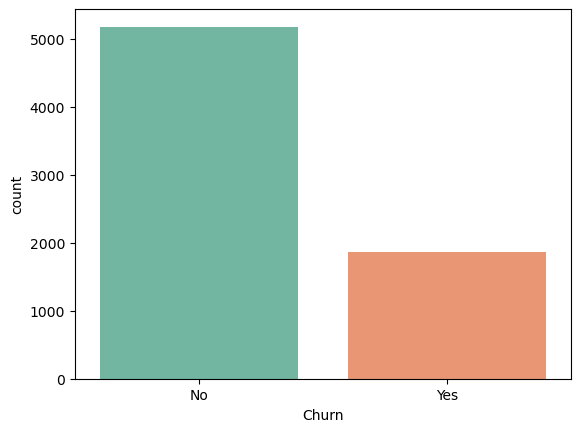

In [9]:
#Visualize the cutsomer churn
sns.countplot(df["Churn"], palette="Set2")
plt.show()

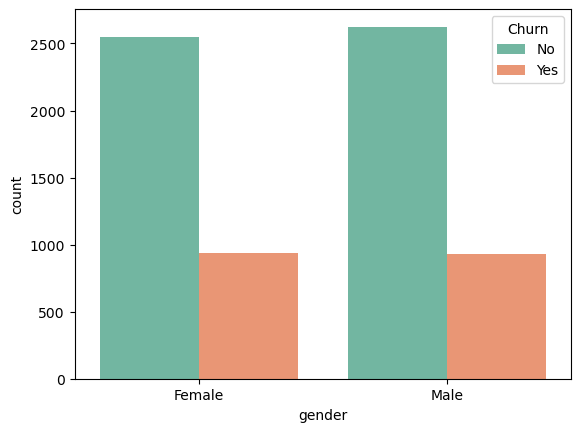

In [10]:
sns.countplot(x = "gender", hue = "Churn", palette="Set2", data=df)
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

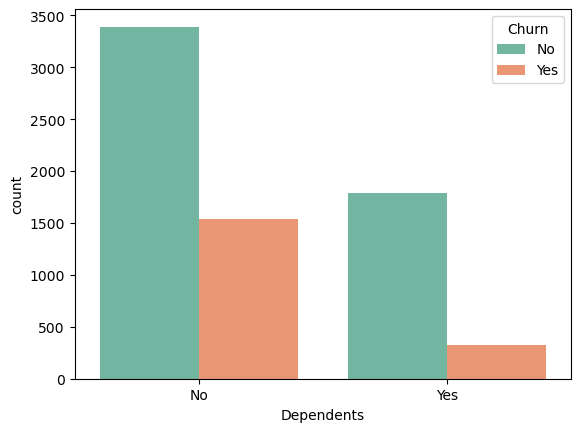

In [11]:
sns.countplot(x='Dependents', hue='Churn', palette='Set2', data=df)

## Data Processing AND Cleaning

In [12]:
# Drop unnecessary for our analysis
cleaned_data = df.drop('customerID', axis=1)
cleaned_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
#Trnsforming non-numerical variables tp numerical
from sklearn.preprocessing import LabelEncoder
for i in cleaned_data.columns:
    if cleaned_data[i].dtype == np.number:
        continue
    cleaned_data[i] = LabelEncoder().fit_transform(cleaned_data[i])

C:\Users\jbnu\AppData\Local\Temp\ipykernel_17740\3822335378.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_data[i].dtype == np.number:


In [14]:
cleaned_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [15]:
#Check first 5 rows of the cleaned data
cleaned_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [16]:
#we scale th cleaned data sp that the result comproses only values between 0 and 1
x = cleaned_data.drop('Churn', axis=1)
y = cleaned_data['Churn']

In [17]:
# we perform one-hot encoding
x = pd.get_dummies(x)

In [18]:
#spliiting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

## MOdel Selection

In [19]:
# we create the model
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\jbnu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [20]:
y_pred = model.predict(x_test)
print(y_pred)

[1 0 0 ... 0 1 0]


In [21]:
#Print the training adn testing set to check for overfitting
print('Training set score:{:.3f}'.format(model.score(x_train, y_train)))
print('Testing set score: {:.3f}'.format(model.score(x_test, y_test)))

Training set score:0.799
Testing set score: 0.806


In [22]:

#Confusion matrix.
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nThe confusion matrix shows', cm[0,0] + cm[1,1],'correct predictions and', cm[1,0] + cm[0,1], 'incorrect predictions.')

print('\nMore Specifically: ')

print('\n-True Positives (Actual Positive:1 and Predict Positive:1) = ', cm[0,0])

print('\n-True Negatives (Actual Negative:0 and Predict Negative:0) = ', cm[1,1])

print('\n-False Positives (Actual Negative:0 but Predict Positive:1) = ', cm[0,1], '(Type I error)')

print('\n-False Negatives (Actual Positive:1 but Predict Negative:0) = ', cm[1,0], '(Type II error)')


Confusion matrix

 [[1391  148]
 [ 262  312]]

The confusion matrix shows 1703 correct predictions and 410 incorrect predictions.

More Specifically: 

-True Positives (Actual Positive:1 and Predict Positive:1) =  1391

-True Negatives (Actual Negative:0 and Predict Negative:0) =  312

-False Positives (Actual Negative:0 but Predict Positive:1) =  148 (Type I error)

-False Negatives (Actual Positive:1 but Predict Negative:0) =  262 (Type II error)


c:\Users\jbnu\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\jbnu\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

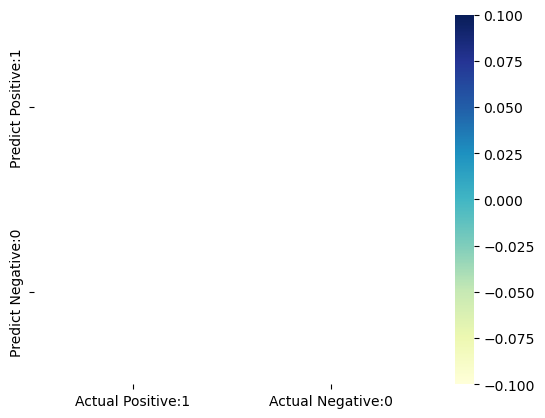

In [23]:
#Visualize the confusion matrix using a seaborn heatmap
cm_matrix = pd.DataFrame(data = df, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                     index = ['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot = True ,fmt ='d', cmap = "YlGnBu")

In [24]:
# We check its precision, recall, f1-score and accuracy.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.68      0.54      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_vgg19.h5')

OSError: No file or directory found at model_vgg19.h5

In [ ]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.01155142, 0.98844856]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
